In [1]:
!pip install yellowbrick

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
diabetes = pd.read_csv('datasets/diabetes.csv')
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
corr_matrix = diabetes.corr()
corr_matrix

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


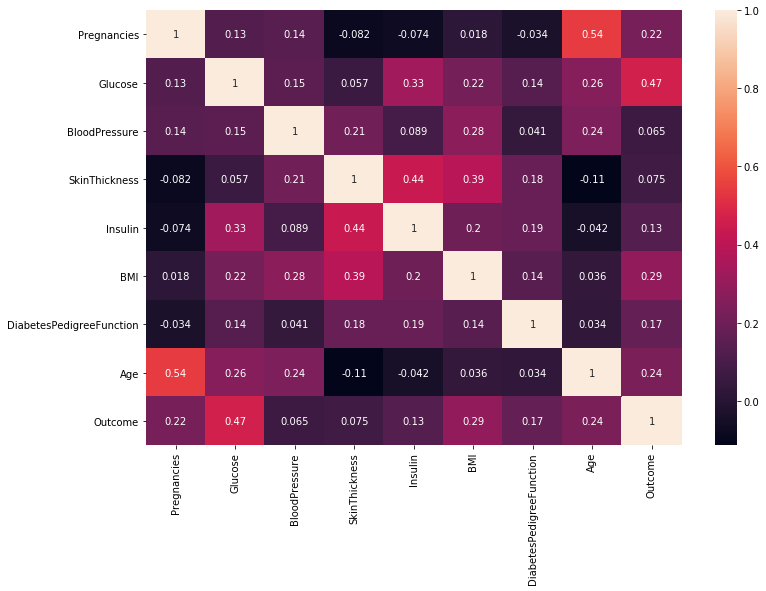

In [5]:
plt.figure(figsize=(12,8))
sns.heatmap(corr_matrix, annot=True)
plt.show()

In [6]:
x = diabetes[['Insulin', 'BMI', 'BloodPressure', 'DiabetesPedigreeFunction']]
y = diabetes['Age']

In [7]:
feature_names = x.columns
feature_names

Index(['Insulin', 'BMI', 'BloodPressure', 'DiabetesPedigreeFunction'], dtype='object')

/media/primz/Education Content/Prime/ML/venv/lib/python3.8/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)
/media/primz/Education Content/Prime/ML/venv/lib/python3.8/site-packages/sklearn/base.py:193: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  warnings.warn('From version 0.24, get_params will raise an '


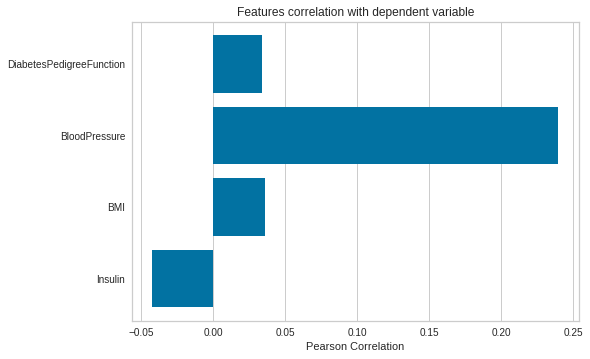

In [8]:
from yellowbrick.target import FeatureCorrelation
visualizer = FeatureCorrelation(labels=feature_names, method='pearson')
visualizer.fit(x, y)
visualizer.poof()

In [9]:
visualizer.scores_

array([-0.04216295,  0.03624187,  0.23952795,  0.03356131])

In [10]:
visualizer.features_

array(['Insulin', 'BMI', 'BloodPressure', 'DiabetesPedigreeFunction'],
      dtype=object)

In [11]:
score_df = pd.DataFrame({
    'Feature_names' : visualizer.features_,
    'Scores' : visualizer.scores_
})
score_df

,Feature_names,Scores
0,Insulin,-0.042163
1,BMI,0.036242
2,BloodPressure,0.239528
3,DiabetesPedigreeFunction,0.033561


In [12]:
x = diabetes.drop(['Outcome'], axis=1)
y = diabetes['Outcome']

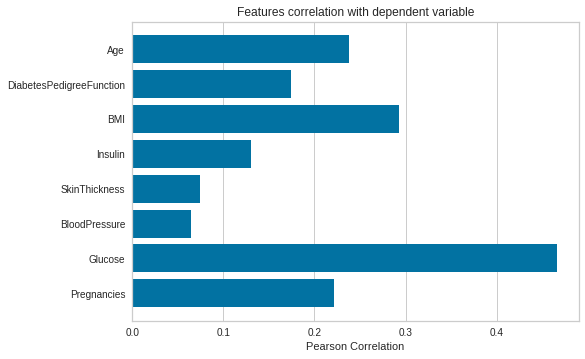

In [13]:
visualizer = FeatureCorrelation(labels=x.columns, method='pearson')
visualizer.fit(x, y)
visualizer.poof()

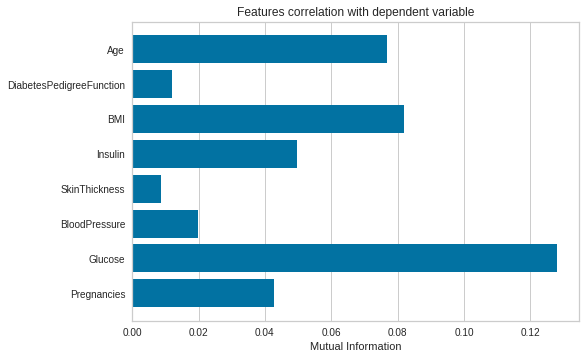

In [14]:
discrete_features = [False for _ in range(len(x.columns))]
discrete_features[0] = True
visualizer = FeatureCorrelation(method='mutual_info-classification', labels=x.columns)
visualizer.fit(x, y, discrete_features=discrete_features, random_state=0)
visualizer.poof()

In [15]:
feature_to_plot = ['Age', 'BMI', 'Insulin', 'BloodPressure', 'Glucose']

/media/primz/Education Content/Prime/ML/venv/lib/python3.8/site-packages/sklearn/base.py:193: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  warnings.warn('From version 0.24, get_params will raise an '


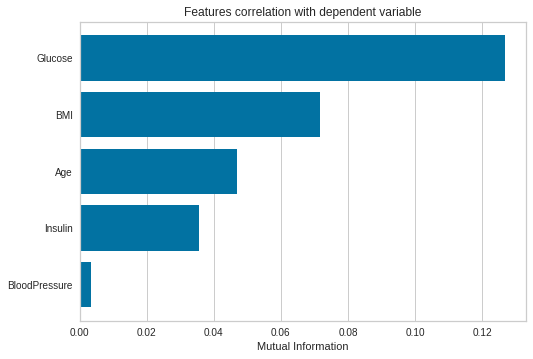

In [17]:
visualizer = FeatureCorrelation(method='mutual_info-classification', feature_names=feature_to_plot, sort=True)
visualizer.fit(x, y, random_state=0)
visualizer.poof()